In [1]:
import pandas as pd
import numpy as np
from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import roc_curve
from sklearn import metrics

In [2]:
## Preprocess
df_raw_data = pd.read_csv('reviews.csv',sep='|',header=0)
df_train = df_raw_data.iloc[df_raw_data.index %5 != 0]
df_test = df_raw_data.iloc[df_raw_data.index %5 == 0]

# preprocess X
# word of bag
word_bag = joblib.load('word_bag.pkl')

X_test = df_test.loc[:,'text'].tolist()
X_test = word_bag.transform(X_test)

X_train = df_train.loc[:,'text'].tolist()
X_train = word_bag.transform(X_train)

# preprocess y
y = df_test['label']
lec = LabelEncoder()
y_test = lec.fit_transform(y)

y = df_train['label']
lec = LabelEncoder()
y_train = lec.fit_transform(y)

In [7]:
# get the feature (v2)
from sklearn.feature_extraction.text import TfidfVectorizer

## Preprocess
df_raw_data = pd.read_csv('reviews.csv',sep='|',header=0)
df_train = df_raw_data.iloc[df_raw_data.index %5 != 0]
df_test = df_raw_data.iloc[df_raw_data.index %5 == 0]

## Preprocess
X_train = df_train.loc[:,'text'].tolist()
X_test = df_test.loc[:,'text'].tolist()
transformer = TfidfVectorizer()
#ngram_range=(1, 3)
X_train = transformer.fit_transform(X_train)
feature_tfidf_name = transformer.get_feature_names()
X_test = transformer.transform(X_test)

# preprocess y
y = df_test['label']
lec = LabelEncoder()
y_test = lec.fit_transform(y)

y = df_train['label']
lec = LabelEncoder()
y_train = lec.fit_transform(y)

In [8]:
joblib.dump(feature_tfidf_name,'tfidf_features.pkl')

['tfidf_features.pkl']

In [ ]:
joblib.dump(transformer,'final_model/Tfidf_n_3.pkl')

## Decision Tree

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
tic = time.time()
clf = DecisionTreeClassifier(criterion='entropy',max_depth=50)
clf.fit(X_train,y_train)
tac = time.time()
print('training time:',tac-tic,'s')

training time: 841.031721830368 s


In [15]:
joblib.dump(clf,'final_model/decision_tree.pkl')

['final_model/decision_tree.pkl']

In [12]:
# accurarcy
y_pred = clf.predict(X_train)
DT_train_ac = accuracy_score(y_train,y_pred)
y_pred = clf.predict(X_test)
DT_test_ac = accuracy_score(y_test,y_pred)

In [33]:
print('training accuracy:',DT_train_ac*100,'%')
print('testing accuracy:',DT_test_ac*100,'%')

training accuracy: 93.4177420918 %
testing accuracy: 76.157673651 %


In [13]:
# precision and recall
DT_p_score = precision_score(y_test,y_pred)
DT_r_score = recall_score(y_test,y_pred)
DT_f1_score = 2*(DT_p_score*DT_r_score)/(DT_p_score+DT_r_score)
print("precision: ",DT_p_score," recall: ",DT_r_score," f1: ",DT_f1_score)

precision:  0.756514678019  recall:  0.770140280561  f1:  0.763266674115


In [14]:
# ROC
DT_fpr,DT_tpr, DT_thresholds = roc_curve(y_test,y_pred)
print(DT_fpr,DT_tpr, DT_thresholds)

[ 0.          0.24695518  1.        ] [ 0.          0.77014028  1.        ] [2 1 0]


## NN model

In [7]:
from sklearn.neural_network import MLPClassifier

In [8]:
tic = time.time()
clf = MLPClassifier(hidden_layer_sizes = (10,10),activation='logistic',max_iter=200,
                    learning_rate_init = 0.01,learning_rate='invscaling',
                    solver='adam',early_stopping=True,random_state=42)
clf.fit(X_train,y_train)
tac = time.time()
print('training time:',tac-tic,'s')

training time: 1177.0293114185333 s


In [14]:
joblib.dump(clf,'final_model/nn_model.pkl')

['final_model/nn_model.pkl']

In [11]:
# accurarcy
y_pred = clf.predict(X_train)
NN_train_ac = accuracy_score(y_train,y_pred)
y_pred = clf.predict(X_test)
NN_test_ac = accuracy_score(y_test,y_pred)
print('training accuracy:',NN_train_ac*100,'%')
print('testing accuracy:',NN_test_ac*100,'%')

training accuracy: 93.1561395339 %
testing accuracy: 90.1235185278 %


In [12]:
# precision and recall
NN_p_score = precision_score(y_test,y_pred)
NN_r_score = recall_score(y_test,y_pred)
NN_f1_score = 2*(NN_p_score*NN_r_score)/(NN_p_score+NN_r_score)
print("precision: ",NN_p_score," recall: ",NN_r_score," f1: ",NN_f1_score)

precision:  0.917797494781  recall:  0.881012024048  f1:  0.899028629857


In [13]:
# ROC
NN_fpr,NN_tpr, NN_thresholds = roc_curve(y_test,y_pred)
print(NN_fpr,NN_tpr, NN_thresholds)

[ 0.          0.07861635  1.        ] [ 0.          0.88101202  1.        ] [2 1 0]


## Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
tic = time.time()
clf = LogisticRegression()
clf.fit(X_train,y_train)
tac = time.time()
print('training time:',tac-tic,'s')

training time: 25.659657955169678 s


In [8]:
joblib.dump(clf,'final_model/logistic.pkl')

['final_model/logistic.pkl']

In [7]:
# accurarcy
y_pred = clf.predict(X_train)
LG_train_ac = accuracy_score(y_train,y_pred)
y_pred = clf.predict(X_test)
LG_test_ac = accuracy_score(y_test,y_pred)
print('training accuracy:',LG_train_ac*100,'%')
print('testing accuracy:',LG_test_ac*100,'%')

training accuracy: 91.9943991424 %
testing accuracy: 90.443566535 %


In [9]:
# precision and recall
LG_p_score = precision_score(y_test,y_pred)
LG_r_score = recall_score(y_test,y_pred)
LG_f1_score = 2*(LG_p_score*LG_r_score)/(LG_p_score+LG_r_score)
print("precision: ",LG_p_score," recall: ",LG_r_score," f1: ",LG_f1_score)

precision:  0.903470173509  recall:  0.905235470942  f1:  0.90435196076


In [10]:
# ROC
LG_fpr,LG_tpr, LG_thresholds = roc_curve(y_test,y_pred)
print(LG_fpr,LG_tpr, LG_thresholds)

[ 0.          0.09636119  1.        ] [ 0.          0.90523547  1.        ] [2 1 0]


## Ensemble model

## RandomForest

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
tic = time.time()
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train,y_train)
tac = time.time()
print('training time:',tac-tic,'s')

training time: 271.4661648273468 s


In [19]:
joblib.dump(clf,'final_model/random_forest.pkl')

['final_model/random_forest.pkl']

In [24]:
# accurarcy
y_pred = clf.predict(X_train)
RF_train_ac = accuracy_score(y_train,y_pred)
y_pred = clf.predict(X_test)
RF_test_ac = accuracy_score(y_test,y_pred)
print('training accuracy:',RF_train_ac*100,'%')
print('testing accuracy:',RF_test_ac*100,'%')

training accuracy: 99.4077218074 %
testing accuracy: 78.468020203 %


In [21]:
# precision and recall
RF_p_score = precision_score(y_test,y_pred)
RF_r_score = recall_score(y_test,y_pred)
RF_f1_score = 2*(RF_p_score*RF_r_score)/(RF_p_score+RF_r_score)
print("precision: ",RF_p_score," recall: ",RF_r_score," f1: ",RF_f1_score)

precision:  0.831082066692  recall:  0.713602204409  f1:  0.767874711916


In [22]:
# ROC
RF_fpr,RF_tpr, RF_thresholds = roc_curve(y_test,y_pred)
print(RF_fpr,RF_tpr, RF_thresholds)

[ 0.          0.14450434  1.        ] [ 0.         0.7136022  1.       ] [2 1 0]


## logistic+randomforest+NN

In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import time

In [20]:
tic = time.time()
clf1 = RandomForestClassifier(n_jobs=-1)
clf2 = LogisticRegression(n_jobs=-1,random_state=42)
clf3 = MLPClassifier(hidden_layer_sizes = (10,10),activation='logistic',max_iter=100,
                    learning_rate_init = 0.01,learning_rate='invscaling',
                    solver='adam',early_stopping=True,random_state=42)

eclf1 = VotingClassifier(estimators=[
        ('rf', clf1), ('lg', clf2),('nn',clf3)],n_jobs=-1,voting='soft')
eclf1.fit(X_train,y_train)
tac = time.time()
print('training time:',tac-tic,'s')

training time: 1486.9226295948029 s


In [21]:
joblib.dump(eclf1,'final_model/ensemble.pkl')

['final_model/ensemble.pkl']

In [22]:
# accurarcy
y_pred = eclf1.predict(X_train)
ES_train_ac = accuracy_score(y_train,y_pred)
y_pred = eclf1.predict(X_test)
ES_test_ac = accuracy_score(y_test,y_pred)
print('training accuracy:',RF_train_ac*100,'%')
print('testing accuracy:',RF_test_ac*100,'%')

training accuracy: 95.8246731531 %
testing accuracy: 90.4348152223 %


In [ ]:
# precision and recall
RF_p_score = precision_score(y_test,y_pred)
RF_r_score = recall_score(y_test,y_pred)
RF_f1_score = 2*(RF_p_score*RF_r_score)/(RF_p_score+RF_r_score)
print("precision: ",RF_p_score," recall: ",RF_r_score," f1: ",RF_f1_score)

## ROC curve

In [3]:
import matplotlib.pyplot as plt

In [48]:
DT_clf = joblib.load('final_model/decision_tree.pkl')
NN_clf = joblib.load('final_model/nn_model.pkl')
LG_clf = joblib.load('final_model/logistic.pkl')
RF_clf = joblib.load('final_model/random_forest.pkl')
ES_clf = joblib.load('final_model/ensemble.pkl')

In [56]:
print([DT_roc_auc*100,LG_roc_auc*100,NN_roc_auc*100,RF_roc_auc*100,ES_roc_auc*100])

[78.013854122090649, 96.510333860293201, 96.469514475691938, 86.421485309893029, 96.265507329923921]


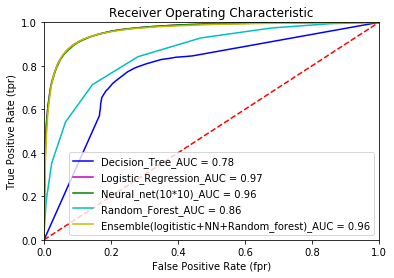

In [5]:
#calculate the fpr and tpr for all thresholds of the classification
#decision tree
DT_probs = DT_clf.predict_proba(X_test)
DT_preds = DT_probs[:,1]
DT_fpr, DT_tpr, DT_threshold = metrics.roc_curve(y_test,DT_preds)
DT_roc_auc = metrics.auc(DT_fpr, DT_tpr)

LG_probs = LG_clf.predict_proba(X_test)
LG_preds = LG_probs[:,1]
LG_fpr, LG_tpr, LG_threshold = metrics.roc_curve(y_test,LG_preds)
LG_roc_auc = metrics.auc(LG_fpr, LG_tpr)

NN_probs = NN_clf.predict_proba(X_test)
NN_preds = NN_probs[:,1]
NN_fpr, NN_tpr, NN_threshold = metrics.roc_curve(y_test,NN_preds)
NN_roc_auc = metrics.auc(NN_fpr, NN_tpr)

RF_probs = RF_clf.predict_proba(X_test)
RF_preds = RF_probs[:,1]
RF_fpr, RF_tpr, RF_threshold = metrics.roc_curve(y_test,RF_preds)
RF_roc_auc = metrics.auc(RF_fpr, RF_tpr)

ES_probs = ES_clf.predict_proba(X_test)
ES_preds = ES_probs[:,1]
ES_fpr, ES_tpr, ES_threshold = metrics.roc_curve(y_test,ES_preds)
ES_roc_auc = metrics.auc(ES_fpr, ES_tpr)

# plot
plt.title('Receiver Operating Characteristic')
plt.plot(DT_fpr, DT_tpr, 'b', label = 'Decision_Tree_AUC = %0.2f' % DT_roc_auc)
plt.plot(LG_fpr, LG_tpr, 'm', label = 'Logistic_Regression_AUC = %0.2f' % LG_roc_auc)
plt.plot(NN_fpr, NN_tpr, 'g', label = 'Neural_net(10*10)_AUC = %0.2f' % NN_roc_auc)
plt.plot(RF_fpr, RF_tpr, 'c', label = 'Random_Forest_AUC = %0.2f' % RF_roc_auc)
plt.plot(ES_fpr, ES_tpr, 'y', label = 'Ensemble(logitistic+NN+Random_forest)_AUC = %0.2f' % ES_roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (tpr)')
plt.xlabel('False Positive Rate (fpr)')
plt.show()

## Evaluate model

In [58]:
y_pred = DT_clf.predict(X_train)
DT_train_ac = accuracy_score(y_train,y_pred)*100
y_pred = NN_clf.predict(X_train)
NN_train_ac = accuracy_score(y_train,y_pred)*100
y_pred = LG_clf.predict(X_train)
LG_train_ac = accuracy_score(y_train,y_pred)*100
y_pred = RF_clf.predict(X_train)
RF_train_ac = accuracy_score(y_train,y_pred)*100
y_pred = ES_clf.predict(X_train)
ES_train_ac = accuracy_score(y_train,y_pred)*100
Training_ac = [DT_train_ac,LG_train_ac,NN_train_ac,RF_train_ac,ES_train_ac]
print(Training_ac)

[93.417742091757802, 91.994399142368678, 93.156139533866124, 99.407721807401757, 95.82467315307656]


In [59]:
y_pred = DT_clf.predict(X_test)
DT_test_ac = accuracy_score(y_test,y_pred)*100
DT_p_score = precision_score(y_test,y_pred)*100
DT_r_score = recall_score(y_test,y_pred)*100
DT_f1_score = 2*(DT_p_score*DT_r_score)/(DT_p_score+DT_r_score)

y_pred = LG_clf.predict(X_test)
LG_test_ac = accuracy_score(y_test,y_pred)*100
LG_p_score = precision_score(y_test,y_pred)*100
LG_r_score = recall_score(y_test,y_pred)*100
LG_f1_score = 2*(LG_p_score*LG_r_score)/(LG_p_score+LG_r_score)

y_pred = NN_clf.predict(X_test)
NN_test_ac = accuracy_score(y_test,y_pred)*100
NN_p_score = precision_score(y_test,y_pred)*100
NN_r_score = recall_score(y_test,y_pred)*100
NN_f1_score = 2*(NN_p_score*NN_r_score)/(NN_p_score+NN_r_score)

y_pred = RF_clf.predict(X_test)
RF_test_ac = accuracy_score(y_test,y_pred)*100
RF_test_ac = accuracy_score(y_test,y_pred)*100
RF_p_score = precision_score(y_test,y_pred)*100
RF_r_score = recall_score(y_test,y_pred)*100
RF_f1_score = 2*(RF_p_score*RF_r_score)/(RF_p_score+RF_r_score)

y_pred = ES_clf.predict(X_test)
ES_test_ac = accuracy_score(y_test,y_pred)*100
ES_test_ac = accuracy_score(y_test,y_pred)*100
ES_p_score = precision_score(y_test,y_pred)*100
ES_r_score = recall_score(y_test,y_pred)*100
ES_f1_score = 2*(ES_p_score*ES_r_score)/(ES_p_score+ES_r_score)

Testing_ac = [DT_test_ac,LG_test_ac,NN_test_ac,RF_test_ac,ES_test_ac]
print(Testing_ac)
p_score = [DT_p_score,LG_p_score,NN_p_score,RF_p_score,ES_p_score]
print(p_score)
r_score = [DT_r_score,LG_r_score,NN_r_score,RF_r_score,ES_r_score]
print(r_score)
f1_score = [DT_f1_score,LG_f1_score,NN_f1_score,RF_f1_score,ES_f1_score]
print(f1_score)

[76.157673651047659, 90.443566534980249, 90.123518527779169, 78.468020203030449, 90.434815222283333]
[75.651467801865209, 90.347017350867546, 91.779749478079324, 83.108206669195084, 91.320716060132654]
[77.014028056112224, 90.523547094188373, 88.101202404809627, 71.360220440881761, 89.323647294589179]
[76.32666741146241, 90.435196075977871, 89.902862985685061, 76.787471191557614, 90.311142629199537]


## Feature importance

In [29]:
values = sorted(zip(feature_tfidf_name, RF_clf.feature_importances_), key=lambda x: x[1] * -1)
feature_imp = {}
for i in zip(feature_tfidf_name, RF_clf.feature_importances_*100):
    feature_imp[i[0]] = i[1]

In [62]:
print(values[:50])

[('not', 0.020812454729523897), ('great', 0.011469824135427315), ('waste', 0.0074298190663252368), ('and', 0.0054899028737268717), ('best', 0.0054132389636220033), ('money', 0.0048467353136542393), ('bad', 0.0043647785224612346), ('was', 0.0043067911473494373), ('good', 0.0042278323380913405), ('the', 0.0042183249253557424), ('love', 0.0042044315897036928), ('boring', 0.0041962503533852858), ('but', 0.0039754334912661263), ('easy', 0.0038757622973307356), ('it', 0.0037445684814688693), ('excellent', 0.0037414389727968927), ('for', 0.0036714666000187044), ('this', 0.0036158761734949572), ('is', 0.0036148620332547864), ('don', 0.003538723803220927), ('worst', 0.0035265968563098112), ('of', 0.003506178050248894), ('to', 0.0034763272718490042), ('perfect', 0.003454931381316334), ('poor', 0.0033924146584344158), ('my', 0.0033677523732797672), ('no', 0.003322701223017221), ('disappointed', 0.0031840367702931595), ('you', 0.0031353170782277159), ('disappointing', 0.0030334692688426608), ('hig

In [64]:
top_50_imp_words = []
top_50_imp_rate = []
for i in values[:50]:
    top_50_imp_words.append(i[0])
    top_50_imp_rate.append(i[1]*100)

In [65]:
print(top_50_imp_words)
print(top_50_imp_rate)

['not', 'great', 'waste', 'and', 'best', 'money', 'bad', 'was', 'good', 'the', 'love', 'boring', 'but', 'easy', 'it', 'excellent', 'for', 'this', 'is', 'don', 'worst', 'of', 'to', 'perfect', 'poor', 'my', 'no', 'disappointed', 'you', 'disappointing', 'highly', 'do', 'horrible', 'in', 'well', 'amazing', 'awesome', 'that', 'on', 'if', 'didn', 'with', 'be', 'have', 'awful', 'only', 'or', 'beautiful', 'would', 'as']
[2.0812454729523897, 1.1469824135427316, 0.74298190663252373, 0.54899028737268718, 0.54132389636220035, 0.4846735313654239, 0.43647785224612345, 0.43067911473494375, 0.42278323380913407, 0.42183249253557425, 0.42044315897036927, 0.41962503533852857, 0.39754334912661266, 0.38757622973307354, 0.37445684814688696, 0.37414389727968927, 0.36714666000187046, 0.36158761734949574, 0.36148620332547865, 0.35387238032209267, 0.3526596856309811, 0.35061780502488937, 0.3476327271849004, 0.3454931381316334, 0.33924146584344156, 0.33677523732797671, 0.33227012230172209, 0.31840367702931593, 0

In [67]:
joblib.dump(top_50_imp_words,'top_50_imp_words.pkl')

['top_50_imp_words.pkl']

In [45]:
top_50_words = joblib.load('top_50_words.pkl')

In [38]:
feature_imp[''] = 0

In [46]:
importances = []
for i in top_50_words:
    importances.append(feature_imp[i])

In [47]:
print(importances)

[0.42183249253557425, 0.54899028737268718, 0.3476327271849004, 0.35061780502488937, 0.37445684814688696, 0.36158761734949574, 0.36148620332547865, 0.29906049738334411, 0.36714666000187046, 0.27726317085035845, 0.43067911473494375, 2.0812454729523897, 0.31353170782277157, 0.25051614138309308, 0.39754334912661266, 0.26778703790062847, 0.1976717872098287, 0.24510863521910808, 0.33677523732797671, 0.21207048048827548, 0.20095098497128552, 0.19798552855707593, 0.2465573286166515, 0.18356616475032722, 0.19444382252304371, 1.1469824135427316, 0.20259314360393488, 0.2645730487893882, 0.19962085628122597, 0.42278323380913407, 0.18087395050641653, 0.089112252863010055, 0.17404022444932099, 0.15965502092489214, 0.19234199004250196, 0.22124589400878308, 0.21417861647770761, 0.15807764204268424, 0.15458651448981373, 0.16900819877380632, 0.16677455431975585, 0.14429317084921181, 0.20813822697484033, 0.15471591427347614, 0.17173657558539837, 0.14459037202458996, 0.14473195127703872, 0.185851137040137